### Introduction

Content-Based Filtering method is a method that build recommendations are based on the content of the courses that the user has taken or liked. For example, if a user rates a Python programming course highly, the system will recommend other programming courses.

In this notebook, we will discuss Content Based using `Bags Of Words` and `Tf-IDF Vectorizer` . I have used `Cosine Similarity` matrix to calculate the similarities in the data.

## **Data Load**

In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import time
import re

pd.set_option('display.max_columns', 200)

plt.style.use('bmh')

%matplotlib inline

In [2]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import the sample course dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project Bismillah/Final/Code/udemy_sample_30.csv')
df.head(3)

,id,course_id,rate,date,display_name,comment,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url,image
0,24371058,1285808,5.0,2018-12-11T20:50:07-08:00,Solihu Gaffar,Well has a beginner things are getting clearer...,Java for Complete Beginners,True,19.99,The Course Where Programming and Fun Meet! Lea...,43631,4.250000,3137,568,43,376,2017-10-30 23:37:17+00:00,2020-12-07,Development,Programming Languages,Java,English,/course/java-for-complete-beginners/,Rupal T,/user/rupal-totale/,https://img-b.udemycdn.com/course/750x422/1285...
1,10287048,1049154,3.0,2017-10-16T06:46:18-07:00,Mark,The pause functionality does not repond,SAP Financial Accounting and Controlling Super...,True,69.99,A complete Beginner and Intermediate SAP FICO ...,5526,4.315790,1110,219,23,379,2016-12-27 16:41:23+00:00,2018-02-02,Office Productivity,SAP,SAP Financial Accounting,English,/course/sap-financial-accounting-and-controlli...,SAP Academy,/user/sadim-rasheed-3/,https://img-c.udemycdn.com/course/750x422/1049...
2,16934964,874012,5.0,2018-05-25T21:22:46-07:00,Nilaksh,Very good one but when you will teach sketch.,The Ultimate Drawing Course - Beginner to Adva...,True,149.99,Learn the #1 most important building block of ...,490520,4.619531,115533,22341,65,669,2017-01-23 00:20:05+00:00,2022-03-16,Design,Graphic Design & Illustration,Drawing,English,/course/the-ultimate-drawing-course-beginner-t...,Jaysen Batchelor,/user/jaysen-batchelor/,https://img-c.udemycdn.com/course/750x422/8740...


In [4]:
# show general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79077 entries, 0 to 79076
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  79077 non-null  int64  
 1   course_id           79077 non-null  int64  
 2   rate                79077 non-null  float64
 3   date                79077 non-null  object 
 4   display_name        79077 non-null  object 
 5   comment             79077 non-null  object 
 6   title               79077 non-null  object 
 7   is_paid             79077 non-null  bool   
 8   price               79077 non-null  float64
 9   headline            79077 non-null  object 
 10  num_subscribers     79077 non-null  int64  
 11  avg_rating          79077 non-null  float64
 12  num_reviews         79077 non-null  int64  
 13  num_comments        79077 non-null  int64  
 14  num_lectures        79077 non-null  int64  
 15  content_length_min  79077 non-null  int64  
 16  publ

In [5]:
df.describe()

,id,course_id,rate,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
count,7.907700e+04,7.907700e+04,79077.000000,79077.000000,7.907700e+04,79077.000000,79077.000000,79077.000000,79077.000000,79077.000000
mean,5.414643e+07,1.435064e+06,4.508814,125.103700,1.295878e+05,4.494631,28395.825221,4140.204889,143.108110,843.082616
std,3.749011e+07,1.035744e+06,0.858114,79.007492,2.352246e+05,0.268680,60455.036592,7366.985448,163.122072,990.989045
min,1.441000e+03,7.723000e+03,0.500000,0.000000,1.000000e+00,1.000000,1.000000,1.000000,3.000000,19.000000
25%,1.981014e+07,6.732220e+05,4.000000,49.990000,7.576000e+03,4.423077,796.000000,171.000000,37.000000,189.000000
50%,5.040158e+07,1.187016e+06,5.000000,149.990000,3.211500e+04,4.561521,4664.000000,835.000000,78.000000,467.000000
75%,8.303134e+07,1.923692e+06,5.000000,199.990000,1.441630e+05,4.650000,26166.000000,4281.000000,181.000000,1161.000000
max,1.267084e+08,4.904954e+06,5.000000,999.000000,1.612862e+06,5.000000,436457.000000,39040.000000,987.000000,11397.000000


## **EDA After Cleaning**

In [6]:
# Change the values in the column of is_paid to 'Paid' and 'Free' to make them more descriptive
df['is_paid'] = df['is_paid'].map(pd.Series({True : 'Paid', False : 'Free'})).astype('object')

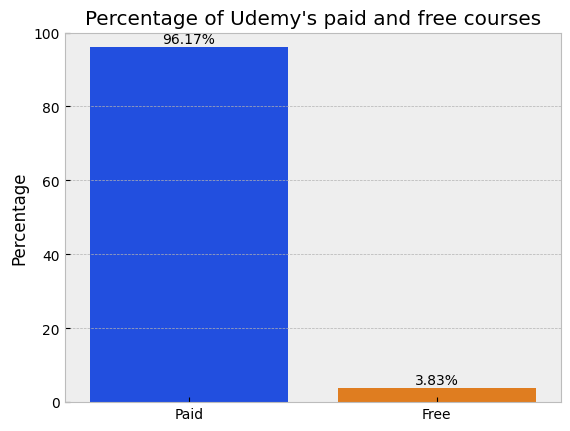

In [7]:
ax = sns.countplot(df, x='is_paid', stat='percent', palette='bright')

percentage = round(df['is_paid'].value_counts() * 100 /len(df), 2)
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height() + 1
   ax.annotate('{:.2f}%'.format(percentage[i]), (x, y), ha='center')

ax.set(xlabel='', ylabel='Percentage', title="Percentage of Udemy's paid and free courses")
plt.ylim(0,100)
plt.show()

In [8]:
def feature_quantity(data,name):
  count_feature = data.groupby(name).agg(num_trx=('id','count')).reset_index()
  return count_feature.sort_values('num_trx',ascending=False)

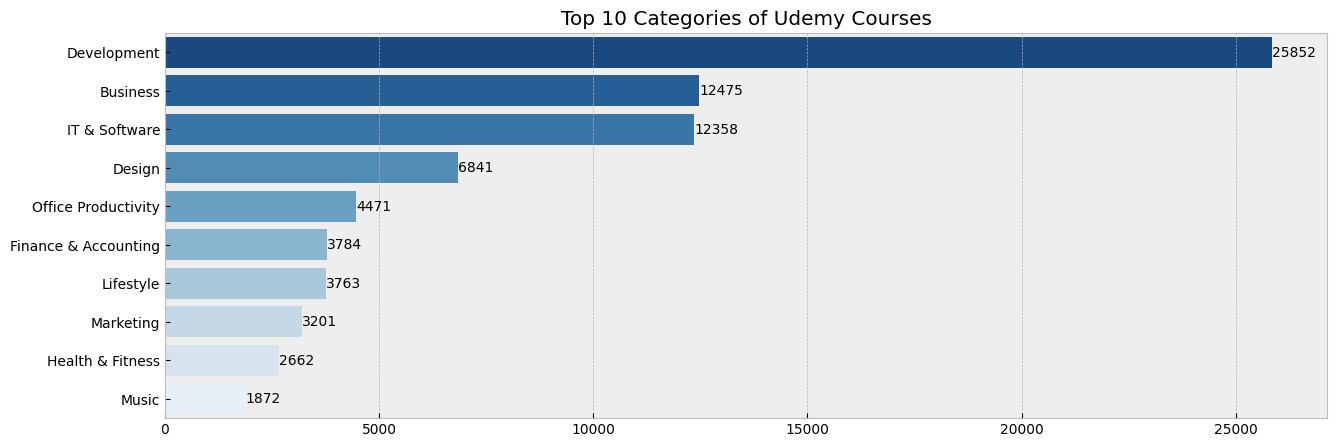

In [9]:
df_category = feature_quantity(df, 'category')[:10]

plt.figure(figsize=(15,5))
ax = sns.barplot(x=df_category['num_trx'], y=df_category['category'], palette='Blues_r')

for label in ax.containers:
    ax.bar_label(label)
ax.set(xlabel='', ylabel='', title='Top 10 Categories of Udemy Courses')
plt.show()

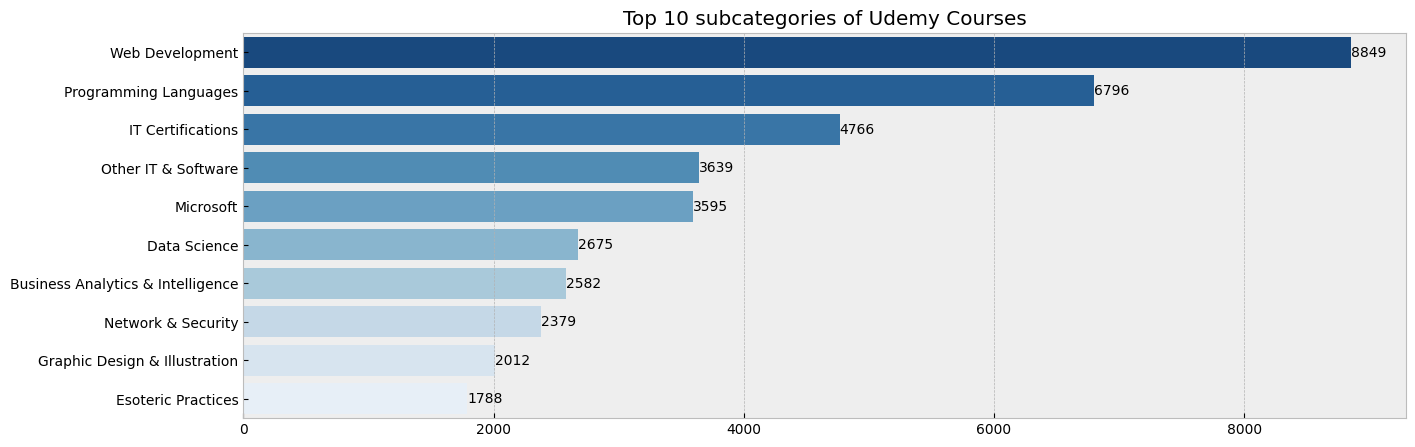

In [10]:
df_subcategory = feature_quantity(df, 'subcategory')[:10]

plt.figure(figsize=(15,5))
ax = sns.barplot(x=df_subcategory['num_trx'], y=df_subcategory['subcategory'], palette='Blues_r')

for label in ax.containers:
    ax.bar_label(label)
ax.set(xlabel='', ylabel='', title='Top 10 subcategories of Udemy Courses')
plt.show()

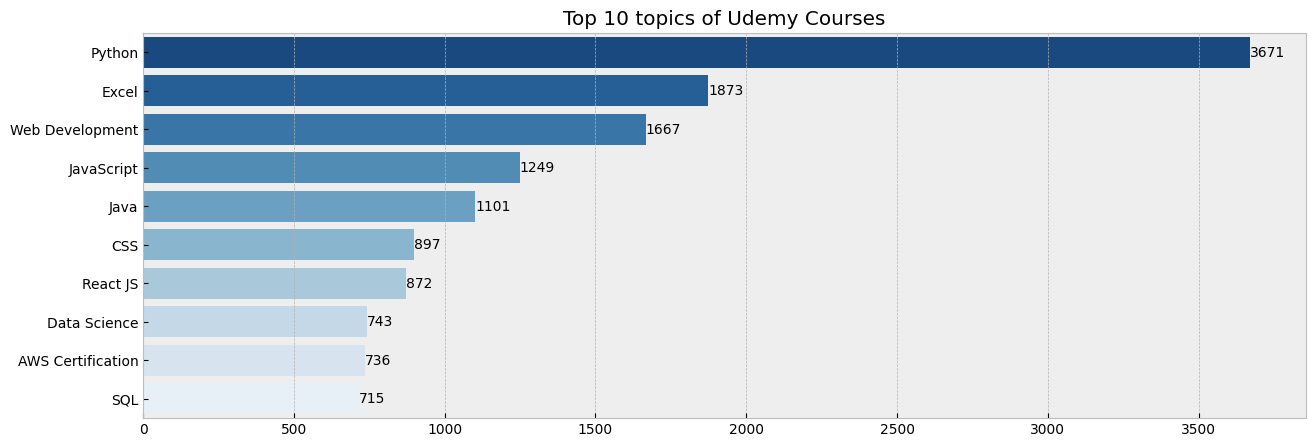

In [11]:
df_topic = feature_quantity(df, 'topic')[:10]

plt.figure(figsize=(15,5))
ax = sns.barplot(x=df_topic['num_trx'], y=df_topic['topic'], palette='Blues_r')

for label in ax.containers:
    ax.bar_label(label)
ax.set(xlabel='', ylabel='', title='Top 10 topics of Udemy Courses')
plt.show()

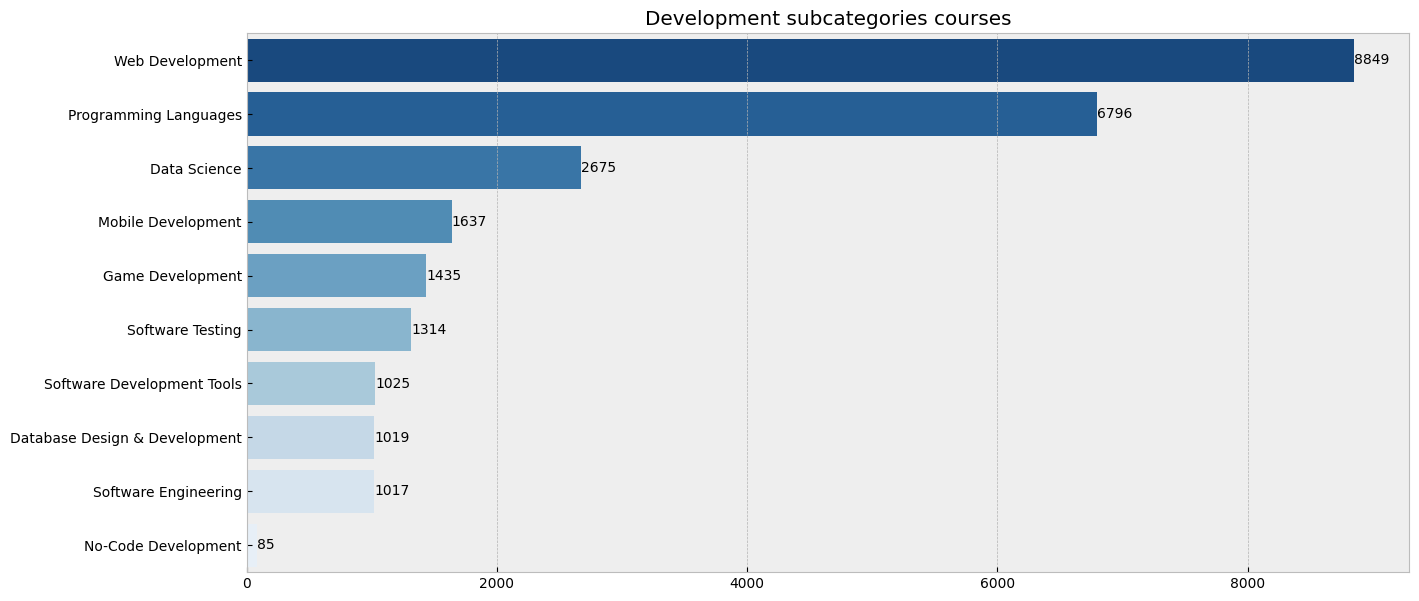

In [12]:
def subcategory_plot(df, category):
    development = df[df['category']==category]
    df_dev = development.groupby('subcategory').size().reset_index(name='count')
    df_dev = df_dev.sort_values(by='count', ascending=False)

    plt.figure(figsize=(15,7))
    ax = sns.barplot(x=df_dev['count'], y=df_dev['subcategory'], palette='Blues_r')

    for label in ax.containers:
        ax.bar_label(label)
    ax.set(xlabel='', ylabel='', title=f'{category} subcategories courses')
    plt.show()

subcategory_plot(df, 'Development')

In [13]:
# Get top courses by categories according to highest num_subscribers
most_popular_courses = df.sort_values(by='num_subscribers', ascending=False).groupby('topic').head(1)
most_popular = most_popular_courses[['title', 'topic','num_subscribers']].reset_index(drop=True)
most_popular.sort_values(by='num_subscribers', ascending=False)

,title,topic,num_subscribers
0,2022 Complete Python Bootcamp From Zero to Her...,Python,1612862
1,Microsoft Excel - Excel from Beginner to Advanced,Excel,1108811
2,The Web Developer Bootcamp 2022,Web Development,823805
3,Java Programming Masterclass covering Java 11 ...,Java,720304
4,The Complete Digital Marketing Course - 12 Cou...,Digital Marketing,706339
...,...,...,...
2518,HIV/AIDS & STD Prevention,Sexual Health,25
2519,Mobile Photo Editing: Start Editing Like a Pro...,Mobile Photography,23
2520,Introduction to Reincarnation,Philosophy,23
2521,Compost from Food Waste and Brown leaves in 35...,Composting,22


In [14]:
# Get top courses by categories according to highest num_subscribers
most_popular_courses = df.sort_values(by='num_subscribers', ascending=False).groupby('category').head(1)
most_popular = most_popular_courses[['title', 'category','num_subscribers']].reset_index(drop=True)
most_popular.sort_values(by='num_subscribers', ascending=False)

,title,category,num_subscribers
0,2022 Complete Python Bootcamp From Zero to Her...,Development,1612862
1,Microsoft Excel - Excel from Beginner to Advanced,Office Productivity,1108811
2,The Complete Digital Marketing Course - 12 Cou...,Marketing,706339
3,Ultimate AWS Certified Solutions Architect Ass...,IT & Software,640699
4,The Complete SQL Bootcamp 2022: Go from Zero t...,Business,574046
5,Adobe Photoshop CC: A Beginner to Advanced Pho...,Design,510784
6,Adobe Premiere Pro CC Masterclass: Video Editi...,Photography & Video,436304
7,The Complete Financial Analyst Course 2022,Finance & Accounting,356765
8,Pianoforall - Incredible New Way To Learn Pian...,Music,355854
9,"Reiki Level I, II and Master/Teacher Program",Lifestyle,168956


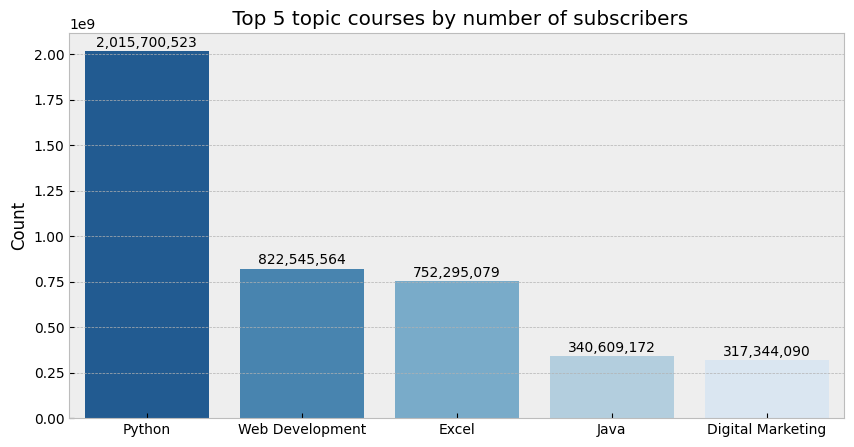

In [15]:
topic_subscribers = df.groupby('topic')['num_subscribers'].sum().reset_index()
top_topic_subs = topic_subscribers.sort_values(by='num_subscribers', ascending=False)[:5]

plt.figure(figsize=(10,5))
ax = sns.barplot(x=top_topic_subs['topic'], y=top_topic_subs['num_subscribers'], palette='Blues_r')

for patch, count in zip(ax.patches, top_topic_subs['num_subscribers']):
    x = patch.get_x() + patch.get_width()/2
    y = patch.get_height()
    ax.annotate('{:,}'.format(count), (x, y), xytext=(0,1), textcoords="offset points",
                ha="center", va="bottom", fontsize=10)


ax.set(xlabel='', ylabel='Count', title=' Top 5 topic courses by number of subscribers')
plt.show()

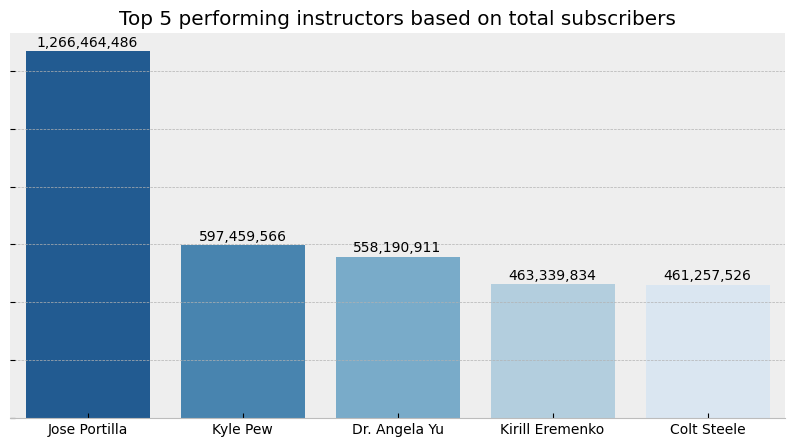

In [16]:
instructor_count = df.groupby('instructor_name')['num_subscribers'].sum().reset_index()
top_instructor = instructor_count.sort_values(by='num_subscribers', ascending=False)[:5]

plt.figure(figsize=(10,5))
ax = sns.barplot(x=top_instructor['instructor_name'], y = top_instructor['num_subscribers'], palette='Blues_r')

patches = ax.patches
for patch, count in zip(patches, top_instructor['num_subscribers']):
    x = patch.get_x() + patch.get_width()/2
    y = patch.get_height()
    ax.annotate('{:,}'.format(count), (x, y), xytext=(0,1), textcoords="offset points",
                ha="center", va="bottom", fontsize=10)

ax.set(xlabel='', ylabel='', title='Top 5 performing instructors based on total subscribers')
ax.set_yticklabels([])
sns.despine(left=True)
plt.show()

In [17]:
# Get top courses by categories according to highest num_subscribers
most_popular_courses = df.sort_values(by='num_subscribers', ascending=False).groupby('instructor_name').head(1)
most_popular = most_popular_courses[['title', 'instructor_name','num_subscribers']].reset_index(drop=True)
most_popular.sort_values(by='num_subscribers', ascending=False)

,title,instructor_name,num_subscribers
0,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,1612862
1,Microsoft Excel - Excel from Beginner to Advanced,Kyle Pew,1108811
2,Automate the Boring Stuff with Python Programming,Al Sweigart,1056369
3,Machine Learning A-Z™: Hands-On Python & R In ...,Kirill Eremenko,896340
4,The Web Developer Bootcamp 2022,Colt Steele,823805
...,...,...,...
7896,Create Your Own Filter For Instagram | Spark A...,Toni Kirscht,4
7897,Solo Travel In France · An Expats Guide And Tr...,Thomasina Shealey,4
7898,Documentary Film Automation using Python,Shubham Gupta,3
7899,Learn How to Produce with Ableton Live 11 in 3...,Powher Sound,1


## **Build Recommendation System**

### **Content-based Filtering using Binary Feature Matrix Vectorizer**

In [19]:
# make unique dataset
unique_title = df.drop_duplicates(subset='title')

In [20]:
# Break down subcategories into rows
subcategory_split = unique_title['subcategory']

In [22]:
subcategory_split[:3]

0            Programming Languages
1                              SAP
2    Graphic Design & Illustration
Name: subcategory, dtype: object

In [21]:
# Using get_dummies to create a binary feature matrix
subcategory_dummies = pd.get_dummies(subcategory_split).groupby(level=0).sum()
subcategory_dummies

,3D & Animation,Accounting & Bookkeeping,Affiliate Marketing,Apple,Architectural Design,Arts & Crafts,Beauty & Makeup,Branding,Business Analytics & Intelligence,Business Law,Business Strategy,Career Development,Commercial Photography,Communication,Compliance,Content Marketing,Cryptocurrency & Blockchain,Dance,Data Science,Database Design & Development,Design Tools,Digital Marketing,Digital Photography,E-Commerce,Economics,Entrepreneurship,Esoteric Practices,Fashion Design,Finance,Finance Cert & Exam Prep,Financial Modeling & Analysis,Fitness,Food & Beverage,Game Design,Game Development,Gaming,General Health,Google,Graphic Design & Illustration,Growth Hacking,Hardware,Home Improvement & Gardening,Human Resources,IT Certifications,Industry,Instruments,Interior Design,Investing & Trading,Leadership,Management,Marketing Analytics & Automation,Marketing Fundamentals,Martial Arts & Self Defense,Media,Meditation,Mental Health,Microsoft,Mobile Development,Money Management Tools,Music Fundamentals,Music Production,Music Software,Music Techniques,Network & Security,No-Code Development,Nutrition & Diet,Operating Systems & Servers,Operations,Oracle,Other Business,Other Design,Other Finance & Accounting,Other Health & Fitness,Other IT & Software,Other Lifestyle,Other Marketing,Other Music,Other Office Productivity,Other Photography & Video,Other Teaching & Academics,Paid Advertising,Pet Care & Training,Photography,Photography Tools,Portrait Photography,Product Marketing,Programming Languages,Project Management,Public Relations,Real Estate,SAP,Safety & First Aid,Sales,Search Engine Optimization,Social Media Marketing,Social Science,Software Development Tools,Software Engineering,Software Testing,Sports,Taxes,Test Prep,Travel,User Experience Design,Video & Mobile Marketing,Video Design,Vocal,Web Design,Web Development,Yoga
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79035,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79040,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [23]:
#Create Matrix
#Use cosine similarity to find the recommendations
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
# Compute the cosine similarity matrix
similarity = cosine_similarity(subcategory_dummies)
similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [25]:
# Function to get the recommended course
def recommendations(title, top_n=10):
    # Find the index of the courses with the given title
    idx = unique_title[unique_title['title'] == title].index[0]

    # Get the cosine similarity scores for the courses
    similarity_scores = list(enumerate(similarity[idx]))

    # Sort the similarity scores in descending order
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the top_n courses indices
    courses_indices = [i[0] for i in similarity_scores[1:top_n+1]]

    # Return the top_n most similar courses
    return unique_title['title'].iloc[courses_indices]

In [26]:
recommendations('Instagram Marketing 2022: Complete Guide To Instagram Growth')

55     Social Media Management - The Complete 2019 Ma...
316    Ultimate Instagram Marketing Course - Everythi...
435        How to Start a Podcast - Podcasting Made Easy
514    WIN at Starting a Social Media Management Busi...
806    TikTok Marketing 2022: Grow Your Account & Mas...
830                              Social Media Monitoring
856    Social Media Marketing MASTERY | Learn Ads on ...
891    Facebook Ads + Marketing MASTERY in 2022: 8-Fi...
921    Instagram Marketing 2022: Hashtags, Live, Stor...
977    Social Media Marketing - Complete Certificate ...
Name: title, dtype: object

In [27]:
recommendations('Python & Machine Learning for Financial Analysis')

69                    Animal Communication For beginners
80                                       Moon Ceremonies
127    Crystal Healing Practitioner Course - Professi...
173         Reiki Level I, II and Master/Teacher Program
181                   Mediumship and Psychic development
184    An introduction to Quantum Energy   Healing Te...
201    Chakra Healing Certificate Course - Effective ...
226    Your 7 Chakras : The Complete Guide to Your En...
234    How to Be Psychic - Psychic Development for Be...
434    Animal & Pet Reiki Energy Healing Certificatio...
Name: title, dtype: object

In [28]:
recommendations('Computer Science 101: Master the Theory Behind Programming')

228    Adobe Premiere Pro CC: Video Editing in Adobe ...
247    Learn Inkscape now - create vector graphics fo...
365      Drawing and Painting on the iPad with Procreate
368    Photoshop Beginners Mastery: Zero to Hero in P...
749    Adobe Illustrator CC Mastery: Zero to Hero in ...
780                         Mastering Adobe Photoshop CC
796                                         Autocad 2010
819              Illustrating with Adobe Illustrator CS3
885                   Photoshop for Web Design Beginners
991    Master Solidworks 2015 - 3D CAD using real-wor...
Name: title, dtype: object

### **Content-based Filtering using Bags Of Words**

In [29]:
# Extract the courses titles and subcategory into separate lists
titles = unique_title['title'].tolist()

In [30]:
titles[:5]

['Java for Complete Beginners',
 'SAP Financial Accounting and Controlling Super User Training',
 'The Ultimate Drawing Course - Beginner to Advanced',
 'Technical Analysis MasterClass:Trading By Technical Analysis',
 'Ansible for the Absolute Beginner - Hands-On - DevOps']

In [31]:
subcategory = [[sub] for sub in unique_title['subcategory']]

In [32]:
subcategory[:3]

[['Programming Languages'], ['SAP'], ['Graphic Design & Illustration']]

In [33]:
# Create a bag of words representation of the course subcategories
def create_bow(subcategory_list):
    bow = {}
    for subcategory in subcategory_list:
        bow[subcategory] = 1
    return bow

In [34]:
# Create a list of bags of words representations of the courses subcategories
bags_of_words = [create_bow(courses_subcategory) for courses_subcategory in subcategory]

In [35]:
bags_of_words[:3]

[{'Programming Languages': 1},
 {'SAP': 1},
 {'Graphic Design & Illustration': 1}]

In [36]:
# Create a dataframe to store the bags of words representation of the courses subcategories
subcategory_df = pd.DataFrame(bags_of_words, index=titles).fillna(0)

In [37]:
subcategory_df.head(3)

,Programming Languages,SAP,Graphic Design & Illustration,Investing & Trading,Other IT & Software,Communication,Esoteric Practices,Microsoft,Digital Marketing,Social Media Marketing,Web Design,Web Development,Apple,Business Analytics & Intelligence,Hardware,Other Lifestyle,Software Testing,Instruments,Other Design,IT Certifications,Video Design,Marketing Fundamentals,Data Science,Other Finance & Accounting,E-Commerce,Management,Network & Security,Content Marketing,Fitness,Finance Cert & Exam Prep,Project Management,Mobile Development,Operating Systems & Servers,Finance,Business Law,Entrepreneurship,Arts & Crafts,3D & Animation,General Health,Photography,Cryptocurrency & Blockchain,Paid Advertising,Financial Modeling & Analysis,Database Design & Development,Accounting & Bookkeeping,User Experience Design,Search Engine Optimization,Business Strategy,Operations,Software Engineering,Software Development Tools,Yoga,Sales,Game Development,Mental Health,Design Tools,Pet Care & Training,Gaming,Media,Music Production,Nutrition & Diet,Digital Photography,Game Design,Google,Sports,Beauty & Makeup,Meditation,Affiliate Marketing,Other Health & Fitness,Other Office Productivity,Music Fundamentals,Industry,Real Estate,No-Code Development,Human Resources,Interior Design,Money Management Tools,Taxes,Safety & First Aid,Other Marketing,Other Photography & Video,Marketing Analytics & Automation,Music Software,Photography Tools,Growth Hacking,Dance,Portrait Photography,Architectural Design,Other Business,Compliance,Commercial Photography,Food & Beverage,Video & Mobile Marketing,Travel,Home Improvement & Gardening,Other Music,Music Techniques,Vocal,Oracle,Martial Arts & Self Defense,Branding,Fashion Design,Public Relations,Product Marketing,Test Prep,Social Science,Economics,Leadership,Career Development,Other Teaching & Academics
Java for Complete Beginners,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SAP Financial Accounting and Controlling Super User Training,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Ultimate Drawing Course - Beginner to Advanced,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#Create Matrix
#Use cosine similarity to find the recommendations
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity matrix between the courses
cosine_similarity = cosine_similarity(subcategory_df)

# Create a dataframe with the cosine similarity scores
similarity_df = pd.DataFrame(cosine_similarity, index=subcategory_df.index, columns=subcategory_df.index)

In [39]:
similarity_df.head(3)

,Java for Complete Beginners,SAP Financial Accounting and Controlling Super User Training,The Ultimate Drawing Course - Beginner to Advanced,Technical Analysis MasterClass:Trading By Technical Analysis,Ansible for the Absolute Beginner - Hands-On - DevOps,Business Writing Skills: The Basics of Written Communication,"Reiki Level I, II and Master Certification - Energy Healing",PowerPoint Presentation Slide Design and Animation,The Complete Digital Marketing Course - 12 Courses in 1,Instagram Marketing 2022: Complete Guide To Instagram Growth,WordPress Course - Beginners Guide to WordPress 6 (2022),Build Websites from Scratch with HTML & CSS,iMovie - Video editing for beginners on Mac OS.,Coding for Beginners 1: You Can Learn to Code!,Power BI A-Z: Hands-On Power BI Training For Data Science!,ESP8266 & Micro Python for Internet of Things,Gandhian Methods to Sustainable Living and Happiness,Appium -Mobile Testing (Android/IOS) from Scratch+Frameworks,The Data Literacy Course: Learn How to Work With Data,Blockchain and Bitcoin Fundamentals,"React - The Complete Guide (incl Hooks, React Router, Redux)",Learn How To Code: Google's Go (golang) Programming Language,Java Programming Masterclass covering Java 11 & Java 17,Selenium WebDriver Masterclass with C#,Learn to Play Trombone: Go From Beginner to Pro in No Time!,The Python Bible™ | Everything You Need to Program in Python,Character Art School: Complete Character Drawing,Fibonacci Trading Masterclass - Fibonacci Retracement (2021),Microsoft Excel - Excel from Beginner to Advanced,Macros & VBA Excel,Complete Agile Scrum Master Certification Training,Adobe Premiere Pro CC Masterclass: Video Editing in Premiere,MBA Course: Marketing and Business Strategy,Microsoft OneDrive For Absolute Beginners - OneDrive Course,Azure Synapse Analytics For Data Engineers -Hands On Project,How to pay for college: Organization for scholarship success,Learn Computer Hardware Basics & Components,Blogging For Beginners: Start a Blog Discover Passive Income,Staking Crypto: Earn Passive Income Daily,Python for Data Science and Machine Learning Bootcamp,ISO/IEC 27001. Information Security Management System.,The Complete Ethical Hacking Course: Beginner to Advanced!,Mastering MS Excel VBA For Beginners,The Complete JavaScript Course 2022: From Zero to Expert!,Modern HTML & CSS From The Beginning (Including Sass),Content Marketing: Grow Your Business with Content Marketing,Microsoft Excel - Advanced Excel Formulas & Functions,The Complete Pandas Bootcamp 2022: Data Science with Python,Powerpoint 2016 2019 365 - Master powerpoint presentation,Bodybuilding the Complete Guide,Visual Basic for Excel - Microsoft VBA Excel Tutorial,Writing With Flair: How To Become An Exceptional Writer,Write to Ignite - Master the Art of Sales Copy & Copywriting,Social Media Management - The Complete 2019 Manager Bootcamp,AWS Certified Solutions Architect Associate Training SAA-C03,Mastering Microsoft Teams - Basics (2022),TOTAL: CompTIA A+ Certification (220-1002).,Build an app with ASPNET Core and Angular from scratch,Rest Api's in Asp.Net Core and C# 2022 Edition,Complete GST Course & Certification - Grow Your CA Practice,The Complete Graphic Design Theory for Beginners Course,SAP Production Planning (PP) Module Online Practical Class,Angular Crash Course for Busy Developers,Pass the Exam: CompTIA Project+ PK0-004,Android Java Masterclass - Become an App Developer,Content Marketing Masterclass: Create Content That Sells,Animal Communication For beginners,JSON in Action: Build JSON-Based Applications,Ubuntu Desktop for Beginners: Start Using Linux Today!,Excel: From beginner to intermediate,Tailwind CSS : The Complete Guide ( Project Included ),Tableau 2022 A-Z: Hands-On Tableau Training for Data Science,Mac Numbers: Creating and Using Spreadsheets On Your Mac,"5G, 4G-LTE, 3G, 2G Cellular Mobile Communications - Wireless",Learn Python & Ethical Hacking From Scratch,Automated Accessibility Testing for React Applications,Moon Cere

In [40]:
courses = 'Instagram Marketing 2022: Complete Guide To Instagram Growth'

In [41]:
# Find the index of the courses in the similarity dataframe
courses_index = similarity_df.index.get_loc(courses)

# Get the top 5 most similar movies to the movie
top_10 = similarity_df.iloc[courses_index].sort_values(ascending=False)[1:11]

# Print the top 5 most similar movies to the movie
print(f'Top 10 similar courses to {courses}:')
print(top_10)

Top 10 similar courses to Instagram Marketing 2022: Complete Guide To Instagram Growth:
Pinterest Marketing from A to Z for Beginners                   1.0
Run Facebook Ads For Customer Engagement & Followers ~ BASIC    1.0
LinkedIn Ads: LinkedIn Lead Generation | LinkedIn Marketing     1.0
10 Instagram Marketing Strategies That Make Me 6-Figures        1.0
Facebook Marketing: How To Improve Your Fan Page Performance    1.0
How To Start a Youtube Channel: Teach Your Passion              1.0
10 Facebook Ads Golden Principles That Make Me 6-Figures        1.0
Generate Leads With Facebook Ads For Local Business [2017]      1.0
Ultimate Facebook Marketing Course 2019 - Step by Step A-Z      1.0
YouTube Ads: Step By Step Guide To YouTube Ads That Convert     1.0
Name: Instagram Marketing 2022: Complete Guide To Instagram Growth, dtype: float64


### **Content-based Filtering using Tf-IDF Vectorizer**

In [42]:
#Import all the required packages
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
# Break down subcategories into rows
subcategory_split

0                Programming Languages
1                                  SAP
2        Graphic Design & Illustration
3                  Investing & Trading
4                  Other IT & Software
                     ...              
79035                   General Health
79037       Other Finance & Accounting
79040         Accounting & Bookkeeping
79041                    Arts & Crafts
79074    Database Design & Development
Name: subcategory, Length: 17791, dtype: object

In [44]:
subcategory_split[:3]

0            Programming Languages
1                              SAP
2    Graphic Design & Illustration
Name: subcategory, dtype: object

In [45]:
# Create a TfidfVectorizer object to transform the courses subcategory into a Tf-idf representation
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(subcategory_split)

In [46]:
tfidf_matrix

<17791x141 sparse matrix of type '<class 'numpy.float64'>'
	with 35454 stored elements in Compressed Sparse Row format>

In [47]:
# Calculate the cosine similarity matrix between the courses
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity = cosine_similarity(tfidf_matrix)

In [48]:
# Create a dataframe with the cosine similarity scores
similarity_df = pd.DataFrame(cosine_similarity, index=unique_title['title'], columns=unique_title['title'])

In [49]:
similarity_df

title,Java for Complete Beginners,SAP Financial Accounting and Controlling Super User Training,The Ultimate Drawing Course - Beginner to Advanced,Technical Analysis MasterClass:Trading By Technical Analysis,Ansible for the Absolute Beginner - Hands-On - DevOps,Business Writing Skills: The Basics of Written Communication,"Reiki Level I, II and Master Certification - Energy Healing",PowerPoint Presentation Slide Design and Animation,The Complete Digital Marketing Course - 12 Courses in 1,Instagram Marketing 2022: Complete Guide To Instagram Growth,WordPress Course - Beginners Guide to WordPress 6 (2022),Build Websites from Scratch with HTML & CSS,iMovie - Video editing for beginners on Mac OS.,Coding for Beginners 1: You Can Learn to Code!,Power BI A-Z: Hands-On Power BI Training For Data Science!,ESP8266 & Micro Python for Internet of Things,Gandhian Methods to Sustainable Living and Happiness,Appium -Mobile Testing (Android/IOS) from Scratch+Frameworks,The Data Literacy Course: Learn How to Work With Data,Blockchain and Bitcoin Fundamentals,"React - The Complete Guide (incl Hooks, React Router, Redux)",Learn How To Code: Google's Go (golang) Programming Language,Java Programming Masterclass covering Java 11 & Java 17,Selenium WebDriver Masterclass with C#,Learn to Play Trombone: Go From Beginner to Pro in No Time!,The Python Bible™ | Everything You Need to Program in Python,Character Art School: Complete Character Drawing,Fibonacci Trading Masterclass - Fibonacci Retracement (2021),Microsoft Excel - Excel from Beginner to Advanced,Macros & VBA Excel,Complete Agile Scrum Master Certification Training,Adobe Premiere Pro CC Masterclass: Video Editing in Premiere,MBA Course: Marketing and Business Strategy,Microsoft OneDrive For Absolute Beginners - OneDrive Course,Azure Synapse Analytics For Data Engineers -Hands On Project,How to pay for college: Organization for scholarship success,Learn Computer Hardware Basics & Components,Blogging For Beginners: Start a Blog Discover Passive Income,Staking Crypto: Earn Passive Income Daily,Python for Data Science and Machine Learning Bootcamp,ISO/IEC 27001. Information Security Management System.,The Complete Ethical Hacking Course: Beginner to Advanced!,Mastering MS Excel VBA For Beginners,The Complete JavaScript Course 2022: From Zero to Expert!,Modern HTML & CSS From The Beginning (Including Sass),Content Marketing: Grow Your Business with Content Marketing,Microsoft Excel - Advanced Excel Formulas & Functions,The Complete Pandas Bootcamp 2022: Data Science with Python,Powerpoint 2016 2019 365 - Master powerpoint presentation,Bodybuilding the Complete Guide,Visual Basic for Excel - Microsoft VBA Excel Tutorial,Writing With Flair: How To Become An Exceptional Writer,Write to Ignite - Master the Art of Sales Copy & Copywriting,Social Media Management - The Complete 2019 Manager Bootcamp,AWS Certified Solutions Architect Associate Training SAA-C03,Mastering Microsoft Teams - Basics (2022),TOTAL: CompTIA A+ Certification (220-1002).,Build an app with ASPNET Core and Angular from scratch,Rest Api's in Asp.Net Core and C# 2022 Edition,Complete GST Course & Certification - Grow Your CA Practice,The Complete Graphic Design Theory for Beginners Course,SAP Production Planning (PP) Module Online Practical Class,Angular Crash Course for Busy Developers,Pass the Exam: CompTIA Project+ PK0-004,Android Java Masterclass - Become an App Developer,Content Marketing Masterclass: Create Content That Sells,Animal Communication For beginners,JSON in Action: Build JSON-Based Applications,Ubuntu Desktop for Beginners: Start Using Linux Today!,Excel: From beginner to intermediate,Tailwind CSS : The Complete Guide ( Project Included ),Tableau 2022 A-Z: Hands-On Tableau Training for Data Science,Mac Numbers: Creating and Using Spreadsheets On Your Mac,"5G, 4G-LTE, 3G, 2G Cellular Mobile Communications - Wireless",Learn Python & Ethical Hacking From Scratch,Automated Accessibility Testing for React Applications,Moon

In [50]:
# Function to get the recommended course
def courses_recommendations(title, top_n=10):
    # Find the index of the courses in the similarity dataframe
    course_index = similarity_df.index.get_loc(title)

    # Get the top 10 most similar courses
    top_10 = similarity_df.iloc[course_index].sort_values(ascending=False)[1:top_n+1]

    return top_10

In [51]:
courses_recommendations('Instagram Marketing 2022: Complete Guide To Instagram Growth')

title
Facebook Marketing 2022. Promote Your Business on Facebook!     1.0
LinkedIn Marketing: Personal Branding and Lead Generation       1.0
Facebook Marketing: Next Level Fan Growth Strategies            1.0
Facebook Marketing: Next Level List Building Strategies         1.0
Facebook Marketing: Reveal The Power of Promoted Posts          1.0
The Complete Facebook Ads & Facebook Marketing Masterclass      1.0
Instagram Marketing 2022: Hashtags, Live, Stories, Ads &more    1.0
Social Media Marketing Mastery: Growing An Engaged Audience     1.0
Social Media Marketing - Complete Certificate Course            1.0
YouTube Ranking & Optimization Mastery - Be No.1 On YouTube     1.0
Name: Instagram Marketing 2022: Complete Guide To Instagram Growth, dtype: float64

In [52]:
courses_recommendations('Python & Machine Learning for Financial Analysis')

title
Projects in Machine Learning : Beginner To Professional         1.0
LEARNING PATH: MATLAB: Powerful Machine Learning with MATLAB    1.0
Deep Learning A-Z™: Hands-On Artificial Neural Networks         1.0
Pandas Masterclass 2022: Advanced Data Analysis with Pandas     1.0
Guide to Careers in Data Science - Interview Hacks [2022]       1.0
Computer Vision In Python! Face Detection & Image Processing    1.0
Machine Learning Practical Workout | 8 Real-World Projects      1.0
Modern Data Analysis Masterclass in Pandas and Python           1.0
ZERO to GOD Python 3.8 FULL STACK MASTERCLASS 45 AI projects    1.0
Statistics Made Easy by Example for Analytics/ data science     1.0
Name: Python & Machine Learning for Financial Analysis, dtype: float64

In [53]:
courses_recommendations('Computer Science 101: Master the Theory Behind Programming')

title
Learn to Develop for Cloud with Pivotal Cloud Foundry           1.0
JavaScript Interview Prep: Practice Problems                    1.0
Kubernetes Certified Application Developer (CKAD) with Tests    1.0
UML Class Diagrams for Programmers                              1.0
Complete guide to MongoDB                                       1.0
Binary: The Foundation of All Computing                         1.0
Apache Kafka Series - Kafka Connect Hands-on Learning           1.0
Managing EC2 and VPC: AWS with Python and Boto3 Series          1.0
Learn MATLAB and Simulink Programming                           1.0
Learn Computer Vision with OpenCV and Python                    1.0
Name: Computer Science 101: Master the Theory Behind Programming, dtype: float64